Análisis Exploratorio de Datos (EDA)

Cargamos las bases de datos usadas para crear las consultas luego de la limpieza de datos:

-Funcion1.csv 

-Funcion2.csv

-Funcion3-4.csv

-Funcion5.csv


In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
import ast

In [100]:
# Lee los archivos csv
df1 = pd.read_csv('Funcion1.csv ')
df2 = pd.read_csv('Funcion2.csv ')
df3 = pd.read_csv('Funcion3-4.csv ')
df4 = pd.read_csv('Funcion5.csv ')

# Imprime los nombres de las columnas de cada DataFrame
print("Columnas en archivo1.csv: ", df1.columns.tolist())
print("Columnas en archivo2.csv: ", df2.columns.tolist())
print("Columnas en archivo3.csv: ", df3.columns.tolist())
print("Columnas en archivo4.csv: ", df4.columns.tolist())


Columnas en archivo1.csv:  ['publisher', 'genres', 'app_name', 'title', 'url', 'release_date', 'tags', 'reviews_url', 'specs', 'price', 'early_access', 'id', 'developer']
Columnas en archivo2.csv:  ['user_id', 'item_id', 'item_name', 'playtime_forever', 'posted_date', 'genres', 'title']
Columnas en archivo3.csv:  ['item_id', 'posted', 'recommend', 'item_name', 'posted_date']
Columnas en archivo4.csv:  ['user_id', 'recommend', 'sentiment_analysis', 'year']


Descripcion estadistica del conjunto de datos df1

In [ ]:
# include='all' da un resumen adicional de los datos
df1.describe(include='all') 

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
count,24063,28851,32132,30084,32134,29963.000000,31971,32132,31464,30757,32134.00000,3.213200e+04,28835
unique,8235,883,32093,30053,32134,NaN,15395,32131,4649,162,NaN,NaN,10991
top,Ubisoft,['Action'],Soundtrack,Soundtrack,http://store.steampowered.com/app/643980/Ironb...,NaN,"['Casual', 'Simulation']",http://steamcommunity.com/app/612880/reviews/?...,['Single-player'],4.99,NaN,NaN,Ubisoft - San Francisco
freq,385,1880,3,3,1,NaN,1292,2,2793,4277,NaN,NaN,1259
mean,NaN,NaN,NaN,NaN,NaN,2014.769716,NaN,NaN,NaN,NaN,0.06059,4.517478e+05,NaN
std,NaN,NaN,NaN,NaN,NaN,3.504082,NaN,NaN,NaN,NaN,0.23858,1.827087e+05,NaN
min,NaN,NaN,NaN,NaN,NaN,1970.000000,NaN,NaN,NaN,NaN,0.00000,1.000000e+01,NaN
25%,NaN,NaN,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,0.00000,3.292775e+05,NaN
50%,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,0.00000,4.520300e+05,NaN
75%,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,0.00000,5.933925e+05,NaN


In [ ]:
# Chequeo de nulos
print("Valores nulos:\n", df1.isnull().sum())

# Valores duplicados
print("Valores duplicados:\n", df1.duplicated().sum())

# Valores faltantes
print("Valores faltantes:\n", df1.isna().sum())

# Tipos de datos
print("Tipos de datos:\n", df1.dtypes)

Valores nulos:
 publisher        7211
genres           2767
app_name            1
title            1602
url                 0
release_date     1609
tags              127
reviews_url         2
specs             613
price               0
early_access        0
id                  2
developer        2791
primer_genero    2767
dtype: int64
Valores duplicados:
 0
Valores faltantes:
 publisher        7211
genres           2767
app_name            1
title            1602
url                 0
release_date     1609
tags              127
reviews_url         2
specs             613
price               0
early_access        0
id                  2
developer        2791
primer_genero    2767
dtype: int64
Tipos de datos:
 publisher         object
genres            object
app_name          object
title             object
url               object
release_date     float64
tags              object
reviews_url       object
specs             object
price            float64
early_access     float64
id     

In [ ]:
# Valores unicos por columna
df1.nunique()


publisher         7382
genres             725
app_name         28814
title            27220
url              28847
release_date        43
tags             13683
reviews_url      28844
specs             3926
price              144
early_access         2
id               28844
developer        10065
primer_genero       22
dtype: int64

In [ ]:
df1['price'].describe()


count     30757
unique      162
top        4.99
freq       4277
Name: price, dtype: object

In [ ]:
# Convertimos 'price' a numérico y eliminar filas no numéricas
df1['price'] = pd.to_numeric(df1['price'], errors='coerce')
df1 = df1.dropna(subset=['price'])


10 titulos de juegos más comunes, con Counter Strike: Global Offensive como el juego más consumido

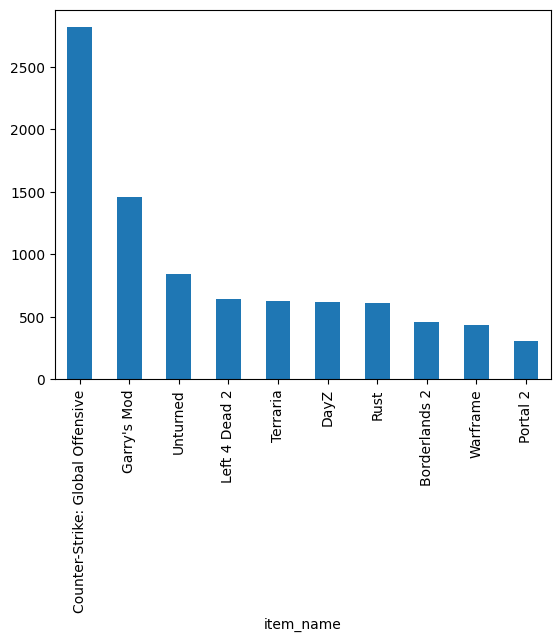

In [ ]:
df2['item_name'].value_counts().head(10).plot(kind='bar')
plt.show()


Se aprecia el aumento del precio de los juegos desde el año 2005 en adelante, con más variedad de precios.

Por otro lado encontramos outliers bastante por encima del precio promedio de los titulos

<Axes: xlabel='price', ylabel='release_date'>

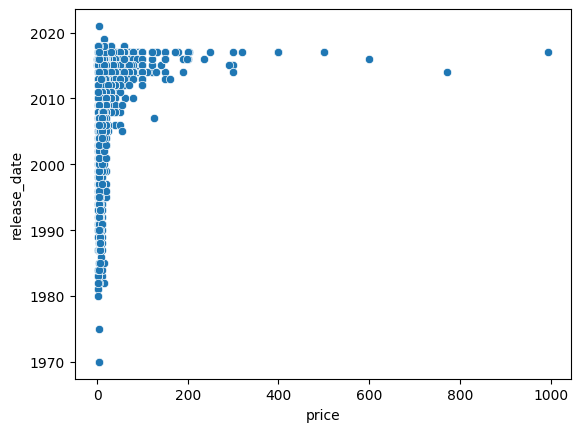

In [ ]:
sns.scatterplot(x=df1['price'], y=df1['release_date'])


La mayoria de los titulos tienen un precio de 70 USD hacia abajo

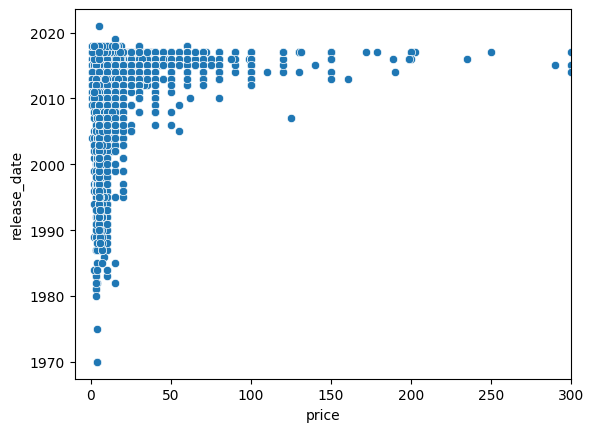

In [ ]:
# Creamos gráfico de dispersión
sns.scatterplot(x=df1['price'], y=df1['release_date'])

# Limitamos el rango del eje x
plt.xlim(-10, 300)

# Mostrar el gráfico
plt.show()

In [ ]:
# Definimos una función para extraer el primer género
def extraer_primer_genero(lista_generos):
    if pd.isnull(lista_generos):
        return None
    lista = ast.literal_eval(lista_generos)
    if lista:
        return lista[0]
    else:
        return None

# Aplicamos la función a la columna 'genres'
df1['primer_genero'] = df1['genres'].apply(extraer_primer_genero)


In [ ]:
# Obtenemos los siete 'primer_genero' más comunes
top_7_primer_genero = df1['primer_genero'].value_counts().nlargest(7).index.tolist()


In [ ]:
# Creamos un nuevo DataFrame con solo los 'primer_genero' de interés
df_top_7_primer_genero = df1[df1['primer_genero'].isin(top_7_primer_genero)]


El genero Acción es el más comun, encontrandose en el rango total de precios

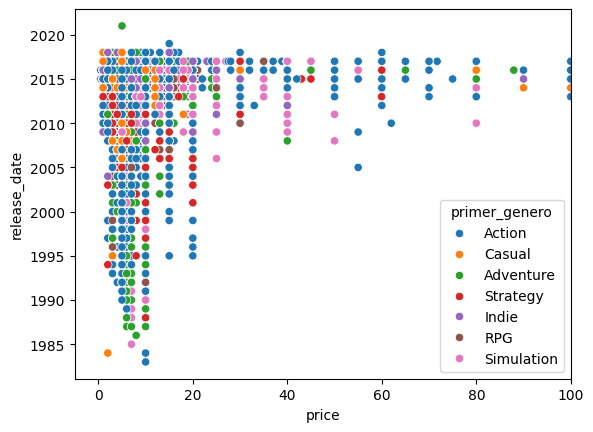

In [ ]:
# Creamos gráfico de dispersión con los siete 'primer_genero' más comunes
sns.scatterplot(x=df_top_7_primer_genero['price'], y=df_top_7_primer_genero['release_date']
                , hue=df_top_7_primer_genero['primer_genero'])

# Limitamos el rango del eje x
plt.xlim(-5, 100)

# Mostrar el gráfico
plt.show()


Analizando la relacion entre genero y precio apreciamos que Simulación es el genero más caro, seguido por RPG, luego los precios se estandarizan, siendo consistentes entre generos

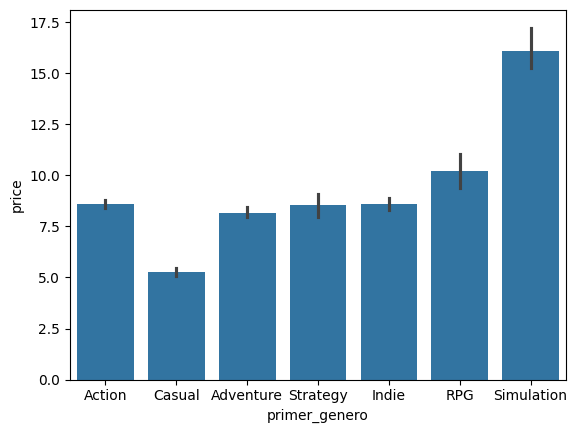

In [ ]:
# Creamos gráfico de barras con los 'primer_genero' de interés
sns.barplot(x=df_top_7_primer_genero['primer_genero'], y=df_top_7_primer_genero['price'])

# Mostrar el gráfico
plt.show()


In [ ]:
# Obtenemos los cinco 'release_date' más comunes
top_release_date= df1['release_date'].value_counts().nlargest(10).index.tolist()

# Creamos un nuevo DataFrame con solo los 'release_date' de interés
df_release_date = df1[df1['release_date'].isin(top_release_date)]

Corroboramos que el genero Simulación corresponde al más caro en los últimos 10 años, aumentando de forma constante su valor.

Por otro lado Casual, Indie, RPG y Adventure pasaron por una campana de gauss completa, los precios volvieron a su base despues de subir por años.

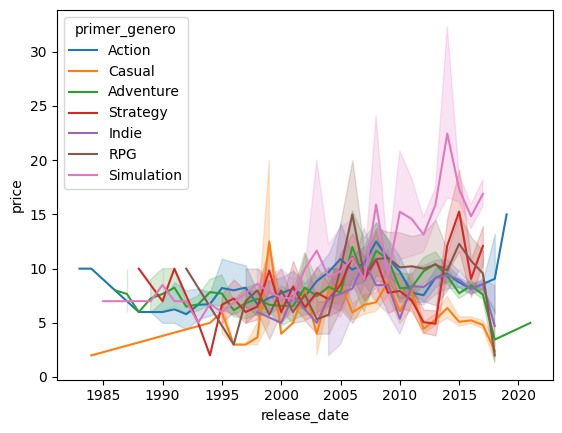

In [ ]:
sns.lineplot(x=df1['release_date'], y=df1['price'], hue=df_top_7_primer_genero['primer_genero'])
plt.show()


La mayoria de los juegos tienen valores bajo 35 usd

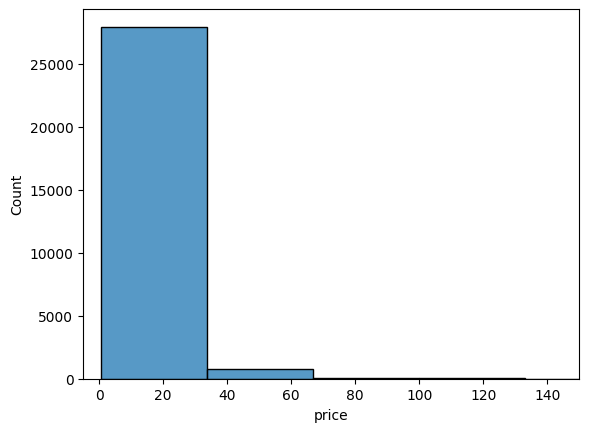

In [ ]:
sns.histplot(df1['price'], bins=30)

# Limitamos el rango del eje x
plt.xlim(-5, 150)

plt.show()


Vemos y rectificamos la existencia de valores atipicos en el precio muy por encima de los valores promedio

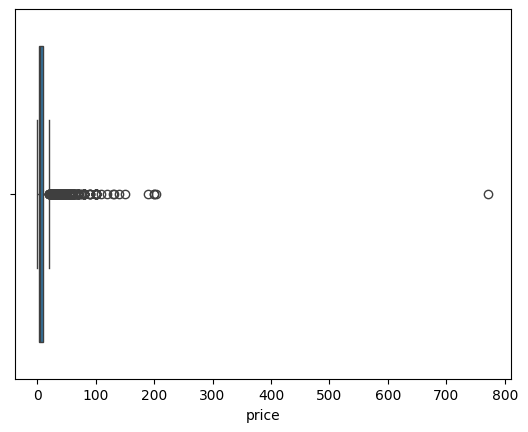

In [ ]:
sns.boxplot(x=df_top_7_primer_genero['price'])
plt.show()


Descripcion estadistica breve del conjunto de datos df2

In [ ]:
df2.describe(include='all')

,user_id,item_id,item_name,playtime_forever,posted_date,genres,title
count,27226,27226.000000,27226,27226.000000,27226.000000,27067,27226
unique,14710,NaN,1663,NaN,NaN,286,1663
top,76561198064484479,NaN,Counter-Strike: Global Offensive,NaN,NaN,['Action'],Counter-Strike: Global Offensive
freq,28,NaN,2817,NaN,NaN,5890,2817
mean,NaN,168020.128443,NaN,10669.219202,2014.211746,NaN,NaN
std,NaN,125562.892536,NaN,25030.249494,0.815017,NaN,NaN
min,NaN,10.000000,NaN,0.000000,2010.000000,NaN,NaN
25%,NaN,9200.000000,NaN,420.250000,2014.000000,NaN,NaN
50%,NaN,217140.000000,NaN,1702.500000,2014.000000,NaN,NaN
75%,NaN,255710.000000,NaN,8166.750000,2015.000000,NaN,NaN


Encontramos valores enlistados para genero en el dataframe (df2), el primer valor corresponde al genero principal y los valores siguientes son los generos segundarios del juego.

In [ ]:
genre_counts = df2['genres'].value_counts()
print("Frecuencia de géneros: \n", genre_counts)

Frecuencia de géneros: 
 genres
['Action']                                                                                5890
['Indie', 'Simulation']                                                                   1804
['Action', 'Adventure']                                                                   1549
['Action', 'Indie']                                                                       1134
['Action', 'Adventure', 'Indie', 'RPG']                                                   1106
                                                                                          ... 
['Action', 'Adventure', 'RPG', 'Early Access']                                               1
['Casual', 'Free to Play', 'Indie', 'RPG', 'Strategy']                                       1
['Adventure', 'Free to Play', 'Massively Multiplayer', 'RPG']                                1
['Action', 'Casual', 'Strategy']                                                             1
['Action', 'Free t

In [ ]:
# Chequeo de nulos
print("Valores nulos:\n", df2.isnull().sum())

# Valores duplicados
print("Valores duplicados:\n", df2.duplicated().sum())

# Valores faltantes
print("Valores faltantes:\n", df2.isna().sum())

# Tipos de datos
print("Tipos de datos:\n", df2.dtypes)

Valores nulos:
 user_id               0
item_id               0
item_name             0
playtime_forever      0
posted_date           0
genres              159
title                 0
dtype: int64
Valores duplicados:
 1188
Valores faltantes:
 user_id               0
item_id               0
item_name             0
playtime_forever      0
posted_date           0
genres              159
title                 0
dtype: int64
Tipos de datos:
 user_id             object
item_id              int64
item_name           object
playtime_forever     int64
posted_date          int64
genres              object
title               object
dtype: object


In [ ]:
# Análisis de los juegos más jugados
top_games = df2.sort_values('playtime_forever', ascending=False)['item_name'].unique()[:10]
print("Los 10 juegos más jugados son: \n", top_games)


Los 10 juegos más jugados son: 
 ["Garry's Mod" 'Universe Sandbox' 'EVE Online' 'Spiral Knights'
 'Counter-Strike: Global Offensive' 'Warframe' 'Crusader Kings II'
 'Shroud of the Avatar: Forsaken Virtues' 'Terraria' 'PlanetSide 2']


Vemos consistencia en los rangos de tiempo promedio jugado por año, min y max no se extralimitan.

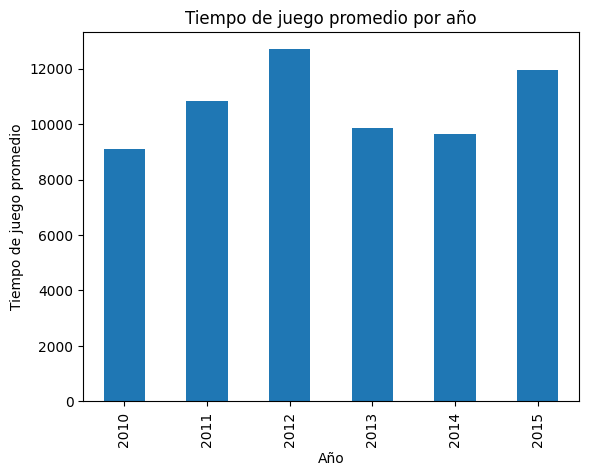

In [ ]:
df2.groupby(df2['posted_date'])['playtime_forever'].mean().plot(kind='bar')
plt.title('Tiempo de juego promedio por año')
plt.xlabel('Año')
plt.ylabel('Tiempo de juego promedio')
plt.show()


In [ ]:
# Análisis de usuarios con más juegos
user_activity = df2.groupby('user_id')['item_name'].nunique().sort_values(ascending=False)

# Usuarios con la mayor cantidad de juegos únicos (top 20)
top_10_users = user_activity.head(20)
print("Los 10 usuarios con la mayor cantidad de juegos únicos: \n", top_10_users)


Los 10 usuarios con la mayor cantidad de juegos únicos: 
 user_id
SpiritOfDeath2               10
76561198060201321            10
76561198103635105             9
Hw__aN                        9
Kaboku                        9
longinus                      9
76561198077787409             9
jumpoffroof                   9
seantheextraprawnsheepguy     9
TheRealMagik                  9
MonsOlympus                   9
Pineapplesarereallytasty      9
Astrelt                       9
NanoPi                        8
Hollowfun                     8
Hobgoblin101                  8
76561198079298522             8
76561198055579125             8
teachmehowtosoli              8
cadeinminecraft               8
Name: item_name, dtype: int64


In [ ]:
# Función para extraer primer genero de la lista

def extraer_primer_genero(lista_generos):
    if pd.isnull(lista_generos):
        return None
    if isinstance(lista_generos, str):
        lista = ast.literal_eval(lista_generos)
    else:
        lista = lista_generos
    if lista:
        return lista[0]
    else:
        return None



# Aplicamos la función a la columna 'genres'
df2['primer_genero'] = df2['genres'].apply(extraer_primer_genero)

In [ ]:
# Obtenemos los cinco 'primer_genero' más comunes
top_7_primer_genero2 = df2['primer_genero'].value_counts().nlargest(7).index.tolist()

# Creamos un nuevo DataFrame con solo los 'primer_genero' de interés
df_top_7_primer_genero2 = df2[df2['primer_genero'].isin(top_7_primer_genero2)]


In [ ]:
print(df2.head())


                     user_id  item_id   item_name  playtime_forever  \
0          76561197970982479    22200  Zeno Clash               271   
1  seantheextraprawnsheepguy    22200  Zeno Clash               240   
2                 pipekissXD    22200  Zeno Clash               690   
3           ClockworkLunatic    22200  Zeno Clash                23   
4                  vschiffer    22200  Zeno Clash               294   

   posted_date               genres       title primer_genero  
0         2011  ['Action', 'Indie']  Zeno Clash        Action  
1         2011  ['Action', 'Indie']  Zeno Clash        Action  
2         2013  ['Action', 'Indie']  Zeno Clash        Action  
3         2015  ['Action', 'Indie']  Zeno Clash        Action  
4         2012  ['Action', 'Indie']  Zeno Clash        Action  


Vemos nuevamente a Acción como el genero más jugado, hay un notorio aumento en el tiempo de juego a lo largo de los años para todos los generos, incluyendose algunos generos con el tiempo

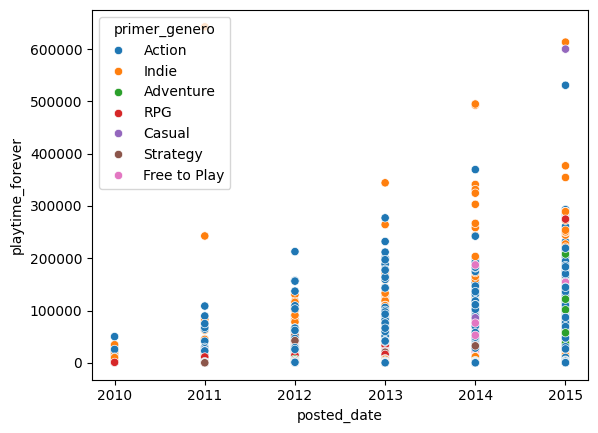

In [ ]:
# Creamos gráfico de dispersión con los 'primer_genero' de interés
sns.scatterplot(y=df_top_7_primer_genero2['playtime_forever'], x=df_top_7_primer_genero2['posted_date']
                , hue=df_top_7_primer_genero2['primer_genero'])

# Mostrar el gráfico
plt.show()


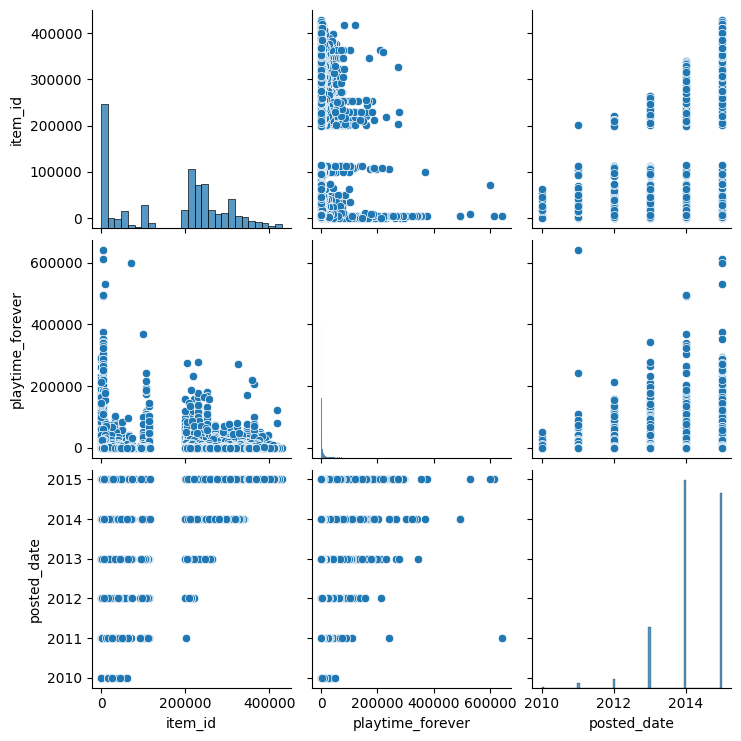

In [ ]:
sns.pairplot(df2)

Para los juegos reseñados, Indie es el más jugado, quedando Acción en segundo lugar. 

Al parecer en el año 2011 hubo un titulo de genero Indie muy reseñado y jugado.

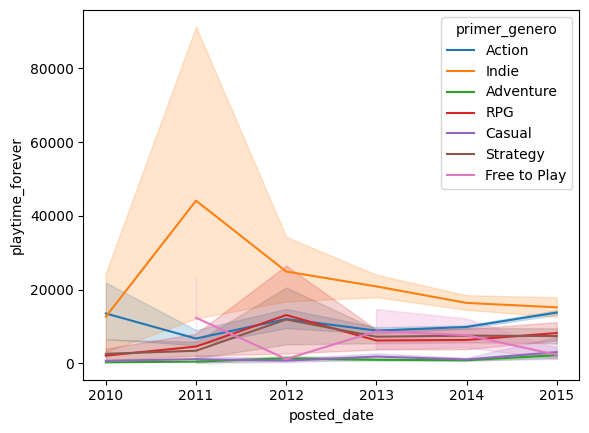

In [ ]:
sns.lineplot(y=df_top_7_primer_genero2['playtime_forever'], x=df_top_7_primer_genero2['posted_date']
                , hue=df_top_7_primer_genero2['primer_genero'])
plt.show()

Corroboramos lo anterior con un grafico de barras

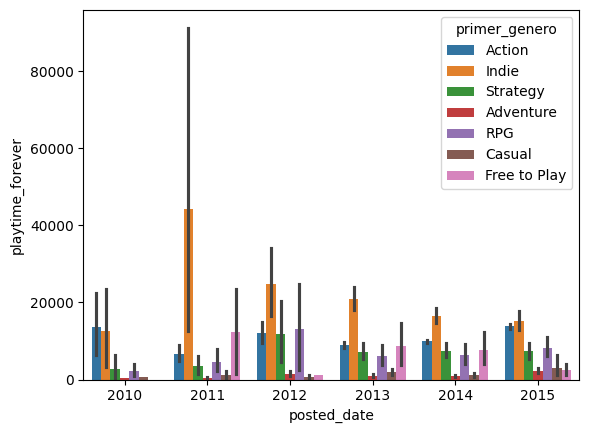

In [ ]:
# Creamos gráfico de barras con los 'primer_genero' de interés
sns.barplot(y=df_top_7_primer_genero2['playtime_forever'], x=df_top_7_primer_genero2['posted_date']
                , hue=df_top_7_primer_genero2['primer_genero'])

# Mostramos el gráfico
plt.show()

Apreciamos consistencia en los datos al graficar sin la variable posted_date (años), persiste Indie y Acción en los primeros lugares

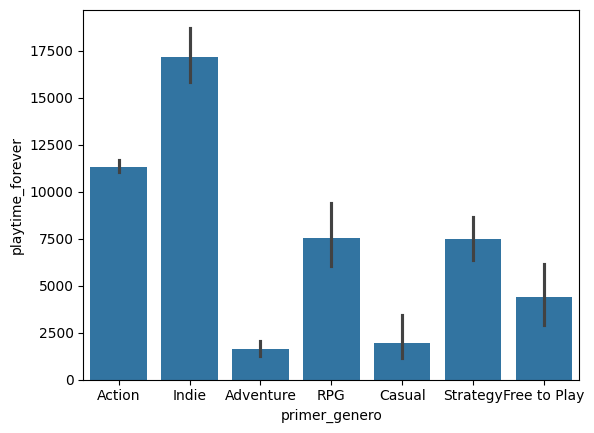

In [ ]:
# Creamos gráfico de barras con los 'primer_genero' de interés
sns.barplot(y=df_top_7_primer_genero2['playtime_forever'], x=df_top_7_primer_genero2['primer_genero'])

# Mostramos el gráfico
plt.show()

Descripcion estadistica breve del conjunto de datos df1

In [ ]:
df3.describe(include='all')

,item_id,posted,recommend,item_name,posted_date
count,161439.000000,161437,161439,161015,135995.000000
unique,NaN,1448,2,1106,NaN
top,NaN,"Posted June 21, 2014.",True,Counter-Strike: Global Offensive,NaN
freq,NaN,888,148891,53530,NaN
mean,104850.587330,NaN,NaN,NaN,2014.239553
std,122603.096938,NaN,NaN,NaN,0.728743
min,0.000000,NaN,NaN,NaN,2010.000000
25%,730.000000,NaN,NaN,NaN,2014.000000
50%,8190.000000,NaN,NaN,NaN,2014.000000
75%,222880.000000,NaN,NaN,NaN,2015.000000


In [ ]:
# Chequeo de nulos
print("Valores nulos:\n", df3.isnull().sum())

# Valores duplicados
print("Valores duplicados:\n", df3.duplicated().sum())

# Valores faltantes
print("Valores faltantes:\n", df3.isna().sum())

# Tipos de datos
print("Tipos de datos:\n", df3.dtypes)


Valores nulos:
 item_id            0
posted             2
recommend          0
item_name        424
posted_date    25444
dtype: int64
Valores duplicados:
 146563
Valores faltantes:
 item_id            0
posted             2
recommend          0
item_name        424
posted_date    25444
dtype: int64
Tipos de datos:
 item_id          int64
posted          object
recommend         bool
item_name       object
posted_date    float64
dtype: object


In [ ]:
# Para cada columna en el DataFrame
for columna in df3.columns:
    # Verificamos duplicados en la columna
    duplicados = df3[df3.duplicated(columna)]
    
    # Imprimimos los valores duplicados en la columna
    print(f"Valores duplicados en la columna '{columna}':")
    print(duplicados)


Valores duplicados en la columna 'item_id':
        item_id                      posted  recommend  \
2           730  Posted September 27, 2015.       True   
4           730      Posted March 14, 2014.       True   
7           730   Posted November 29, 2014.       True   
8           730      Posted August 2, 2014.       True   
10          730            Posted March 27.       True   
...         ...                         ...        ...   
161434      730               Posted May 6.      False   
161435   200210    Posted December 5, 2014.       True   
161436      730    Posted October 18, 2014.       True   
161437   310380    Posted December 6, 2014.       True   
161438     4000           Posted January 8.       True   

                               item_name  posted_date  
2       Counter-Strike: Global Offensive       2015.0  
4       Counter-Strike: Global Offensive       2014.0  
7       Counter-Strike: Global Offensive       2014.0  
8       Counter-Strike: Global Offe

Los valores duplicados son en nuestra DB son independientes entre sí, ya que varios usuarios pueden escoger el mismo juego, recomendacion o item.

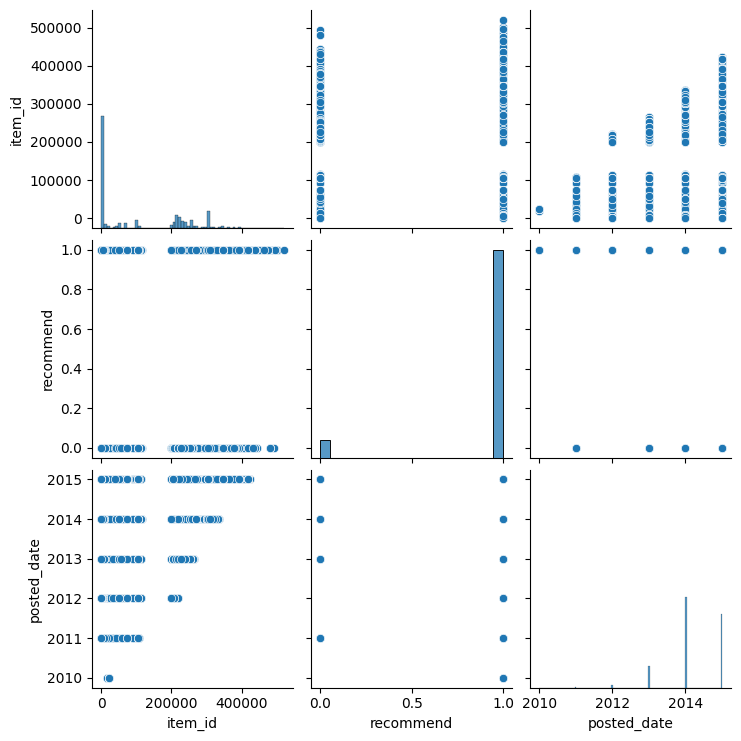

In [ ]:
sns.pairplot(df3)
plt.show()

In [ ]:
# Contar el número de valores nulos en 'posted_date'
num_nulos = df3['posted_date'].isnull().sum()
print(f"Número de valores nulos en 'posted_date': {num_nulos}")

# Ver los valores únicos en 'posted_date'
valores_unicos = df3['posted_date'].unique()
print(f"Valores únicos en 'posted_date': {valores_unicos}")


Número de valores nulos en 'posted_date': 25444
Valores únicos en 'posted_date': [2014.   nan 2015. 2013. 2011. 2012. 2010.]


In [ ]:
# Eliminar las filas con valores 'NaN' en 'posted_date'
df3 = df3.dropna(subset=['posted_date'])

# Reemplazar los valores vacíos con 'NaN' y luego eliminar esas filas
df3['posted_date'] = df3['posted_date'].replace("", pd.NA)
df3 = df3.dropna(subset=['posted_date'])


In [ ]:
# Contar el número de valores nulos en 'posted_date'
num_nulos = df3['posted_date'].isnull().sum()
print(f"Número de valores nulos en 'posted_date': {num_nulos}")

# Ver los valores únicos en 'posted_date'
valores_unicos = df3['posted_date'].unique()
print(f"Valores únicos en 'posted_date': {valores_unicos}")

Número de valores nulos en 'posted_date': 0
Valores únicos en 'posted_date': [2014. 2015. 2013. 2011. 2012. 2010.]


La cantidad de recomendaciones o reseñas positivas es considerablemente mayor a las negativas.

Los usuarios han tomado con el tiempo más iniciativa a escribir reseñas sean positivas o negativas

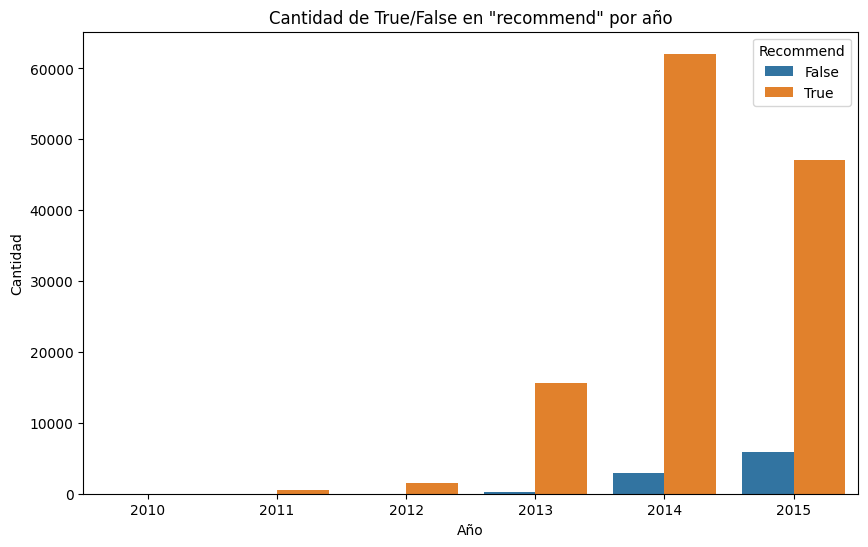

In [ ]:
# Convertimos 'posted_date' a int (número entero) para asegurar que se trate como una variable categórica
df3['posted_date'] = df3['posted_date'].astype(int)

plt.figure(figsize=(10,6))
sns.countplot(data=df3, x='posted_date', hue='recommend')
plt.title('Cantidad de True/False en "recommend" por año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='Recommend')
plt.show()


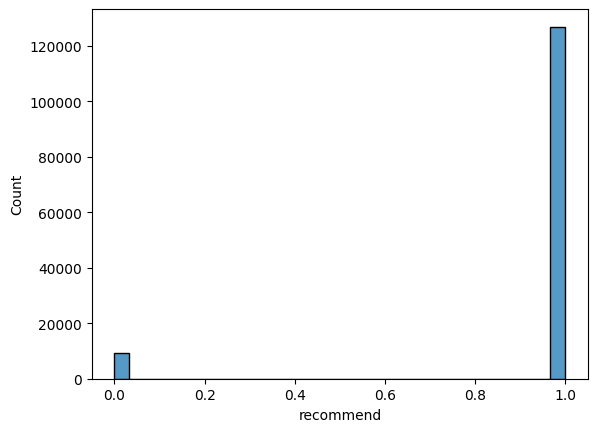

In [ ]:
sns.histplot(df3['recommend'], bins=30)
plt.show()


Descripcion estadistica del conjunto de datos df4

In [ ]:
df4.describe(include='all')

,user_id,recommend,sentiment_analysis,year
count,49186,49186,49186.000000,49186.000000
unique,22795,2,NaN,NaN
top,OfficialSenix,True,NaN,NaN
freq,20,44182,NaN,NaN
mean,NaN,NaN,1.796527,2014.150205
std,NaN,NaN,0.604608,0.841830
min,NaN,NaN,0.000000,2010.000000
25%,NaN,NaN,2.000000,2014.000000
50%,NaN,NaN,2.000000,2014.000000
75%,NaN,NaN,2.000000,2015.000000


In [ ]:
# Chequeo de nulos
print("Valores nulos:\n", df4.isnull().sum())

# Valores duplicados
print("Valores duplicados:\n", df4.duplicated().sum())

# Valores faltantes
print("Valores faltantes:\n", df4.isna().sum())

# Tipos de datos
print("Tipos de datos:\n", df4.dtypes)

Valores nulos:
 user_id               0
recommend             0
sentiment_analysis    0
year                  0
dtype: int64
Valores duplicados:
 16367
Valores faltantes:
 user_id               0
recommend             0
sentiment_analysis    0
year                  0
dtype: int64
Tipos de datos:
 user_id               object
recommend               bool
sentiment_analysis     int64
year                   int64
dtype: object


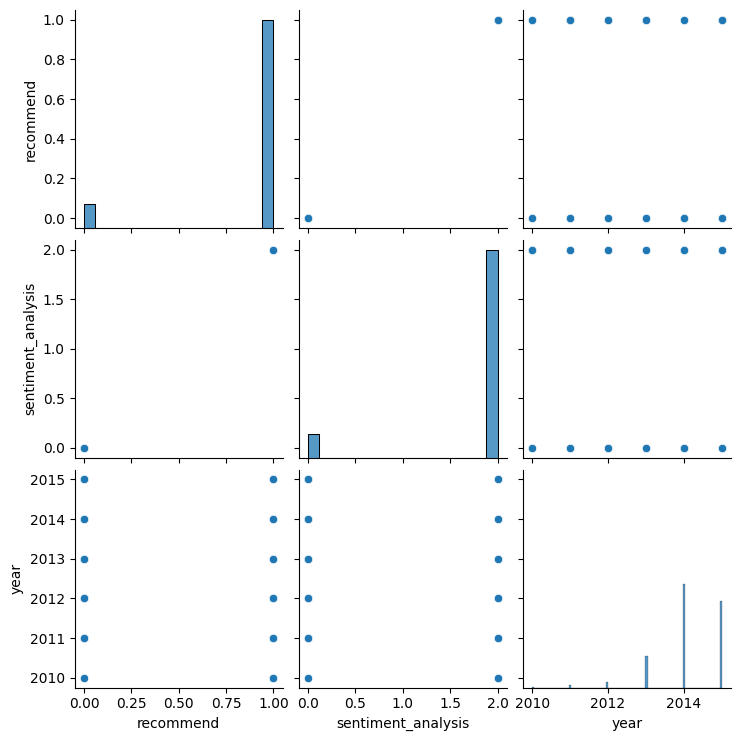

In [ ]:
sns.pairplot(df4)
plt.show()

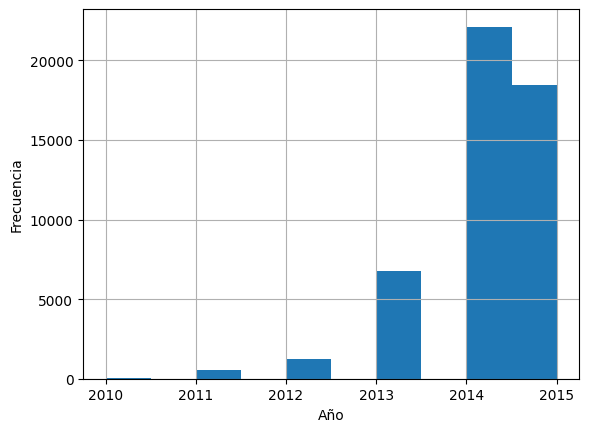

In [ ]:
df4['year'].hist(bins=10)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

Analisis a partir de la combinación de los dataframes

In [ ]:
# Unimos df3 y df2
df_union = pd.merge(df3[['item_name', 'recommend', 'posted_date']], df2[['title']], left_on='item_name', right_on='title')


En el siguiente mapa de calor observamos como las reseñas positivas toman colores rojos intensos, esto denota la gran cantidad de valores.

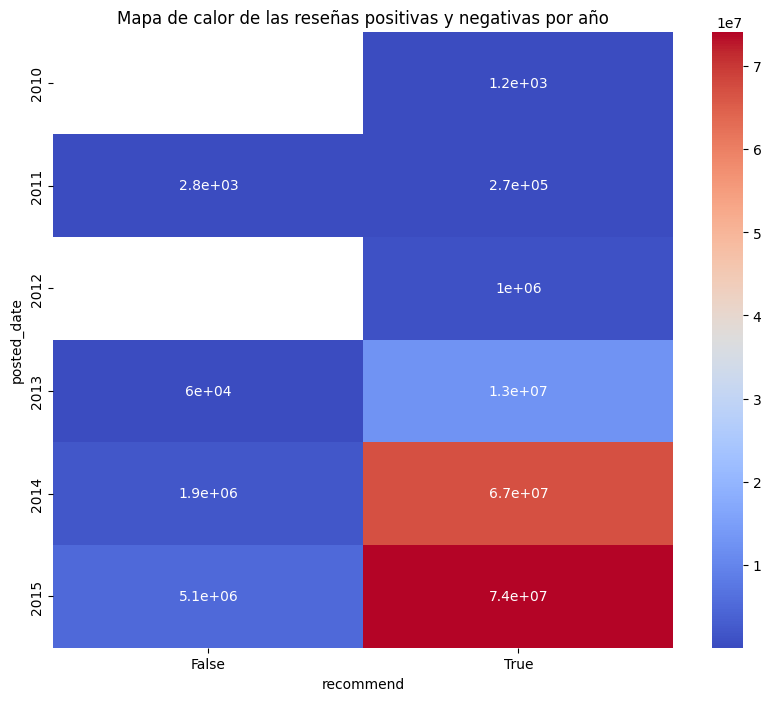

In [ ]:
# Creamos un DataFrame para las reseñas positivas y negativas
df_resenas = df_union.groupby(['posted_date', 'recommend']).size().reset_index(name='Reseñas')

# Creamos el mapa de calor para las reseñas positivas y negativas
plt.figure(figsize=(10, 8))
pivot_table = df_resenas.pivot(index='posted_date', columns='recommend', values='Reseñas')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de las reseñas positivas y negativas por año')
plt.show()


En el siguiente top 10 tenemos un mapa de calor donde el juego Counter-Strike: Globel Offensive demuestra ser el más comun reseñado entre todos los juegos, seguido por Garry's Mod

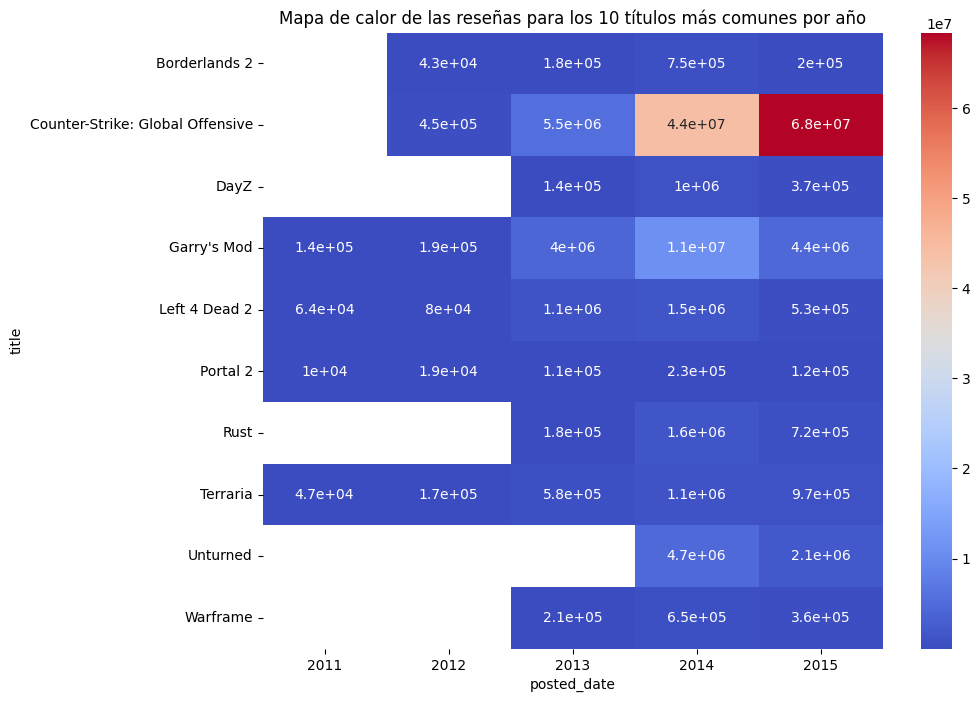

In [ ]:
# Calcular el número de reseñas para cada combinación de título y año
df_resenas = df_union.groupby(['title', 'posted_date']).size().reset_index(name='Reseñas')

# Encontrar los 10 títulos con más reseñas
top_titulos = df_resenas.groupby('title')['Reseñas'].sum().nlargest(10).index

# Filtrar las reseñas para los 10 títulos más comunes
df_resenas_top_titulos = df_resenas[df_resenas['title'].isin(top_titulos)]

# Creamos el mapa de calor

plt.figure(figsize=(10, 8))
pivot_table = df_resenas_top_titulos.pivot(index='title', columns='posted_date', values='Reseñas')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de las reseñas para los 10 títulos más comunes por año')
plt.show()


In [ ]:
# Unimos df3 y df1
df_total = pd.merge(df3[['item_name', 'recommend', 'posted_date']], df1[['title', 'price']], left_on='item_name', right_on='title')

Los siguientes precios 4.99, 9.99, 14.99, 19,99 son los más reseñados según el mapa de calor, existiendo una relación notoria entre estos valores. Podrian ser valores interesantes para crear estrategias de marketing como ofertas, precios de lanzamiento, etc..

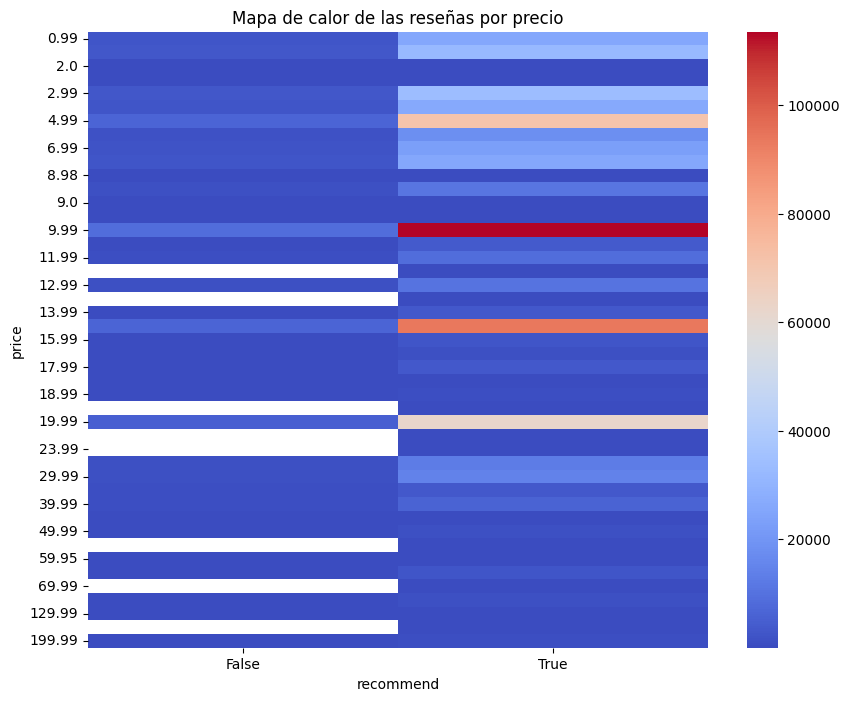

In [ ]:

# Calcular el número de reseñas para cada precio
df_resenas = df_total.groupby(['price', 'recommend']).size().reset_index(name='Reseñas')

# Crear el mapa de calor para las reseñas
plt.figure(figsize=(10, 8))
pivot_table = df_resenas.pivot(index='price', columns='recommend', values='Reseñas')
sns.heatmap(pivot_table, cmap='coolwarm')
plt.title('Mapa de calor de las reseñas por precio')
plt.show()
